# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [47]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [114]:
url_base = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
url = f"{url_base}appid={weather_api_key}&units={units}"
url

'http://api.openweathermap.org/data/2.5/weather?appid=d60723dcf61a29320e57b97d04340299&units=metric'

In [58]:
# Set the API base URL
#url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as E:
        print(E)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | ergani
Processing Record 3 of Set 1 | coquimbo
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | portland
Processing Record 6 of Set 1 | saynshand
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | chui
Processing Record 9 of Set 1 | jati
Processing Record 10 of Set 1 | choyr
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | choibalsan
Processing Record 13 of Set 1 | noosa heads
Processing Record 14 of Set 1 | puerto san carlos
'coord'
Processing Record 15 of Set 1 | perevolotskiy
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | praia da vitoria
Processing Record 18 of Set 1 | vorkuta
Processing Record 19 of Set 1 | los angeles
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | bardai
Processing Record 22 of Set 1 | qaqortoq
Processing

In [59]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [60]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,17.40,89,75,3.60,ZA,1697490926
1,ergani,38.2653,39.7621,16.21,64,15,0.69,TR,1697491563
2,coquimbo,-29.9533,-71.3436,16.85,67,0,6.17,CL,1697491349
3,bethel,41.3712,-73.4140,16.40,65,75,3.60,US,1697491202
4,portland,45.5234,-122.6762,19.79,89,75,3.60,US,1697490947


In [64]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,17.40,89,75,3.60,ZA,1697490926
1,ergani,38.2653,39.7621,16.21,64,15,0.69,TR,1697491563
2,coquimbo,-29.9533,-71.3436,16.85,67,0,6.17,CL,1697491349
3,bethel,41.3712,-73.4140,16.40,65,75,3.60,US,1697491202
4,portland,45.5234,-122.6762,19.79,89,75,3.60,US,1697490947


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

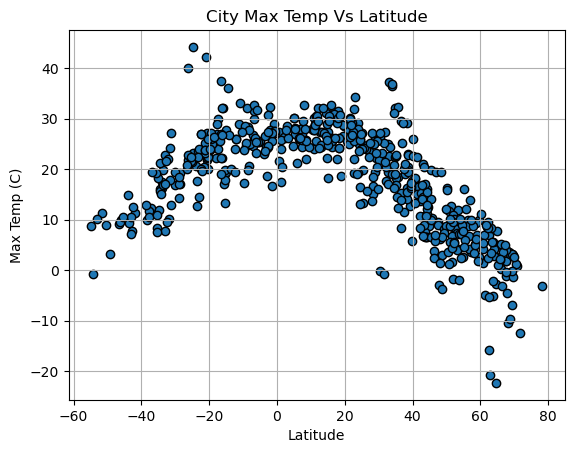

In [84]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker='o', edgecolors='black',)
plt.title("City Max Temp Vs Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

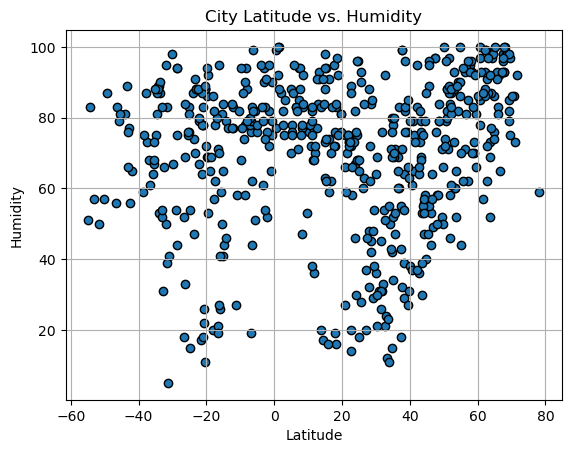

In [77]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

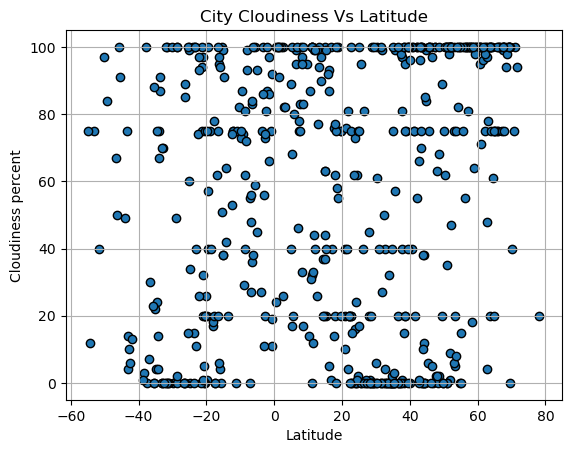

In [83]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')
plt.title("City Cloudiness Vs Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness percent')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

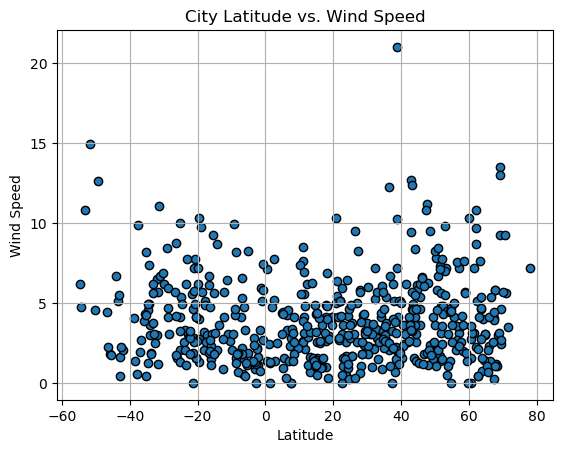

In [82]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemisphere_df = city_data_df.loc[(city_data_df['Lat']>=0)]
# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ergani,38.2653,39.7621,16.21,64,15,0.69,TR,1697491563
3,bethel,41.3712,-73.4140,16.40,65,75,3.60,US,1697491202
4,portland,45.5234,-122.6762,19.79,89,75,3.60,US,1697490947
5,saynshand,44.8824,110.1163,8.67,40,99,6.13,MN,1697491564
8,jati,24.3539,68.2671,26.02,75,0,4.19,PK,1697491564


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,17.40,89,75,3.60,ZA,1697490926
2,coquimbo,-29.9533,-71.3436,16.85,67,0,6.17,CL,1697491349
6,grytviken,-54.2811,-36.5092,-0.78,83,12,4.77,GS,1697490929
7,chui,-33.6971,-53.4616,19.87,87,91,1.88,UY,1697491564
10,new norfolk,-42.7826,147.0587,7.73,77,10,1.59,AU,1697491400


###  Temperature vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Temp vs Latitude Linear Regression (North Hem)')

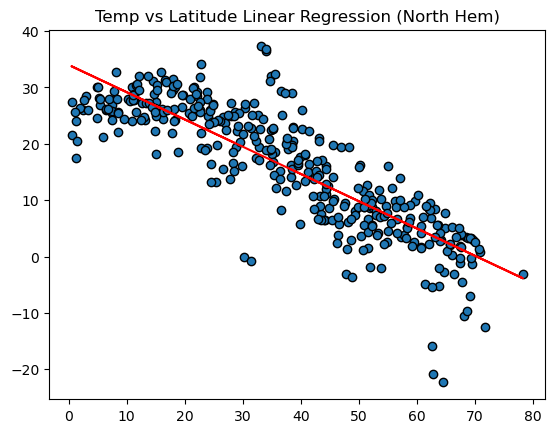

In [179]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemisphere_df['Lat']
y_axis = northern_hemisphere_df['Max Temp']
(slope, intercept, r_value, p_value, stderr) = linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis, regress, color='red')
plt.title('Temp vs Latitude Linear Regression (North Hem)')

Text(0.5, 1.0, 'Temp vs Latitude Linear Regression (South Hem)')

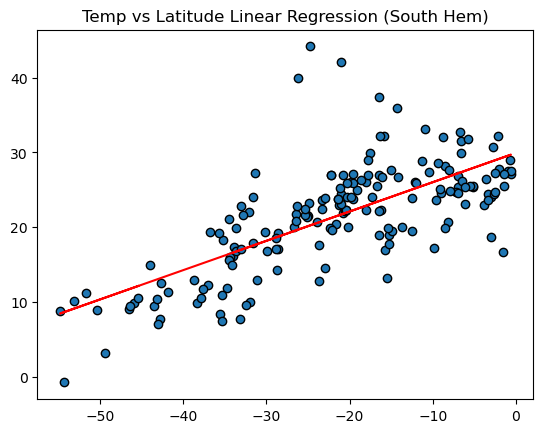

In [178]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemisphere_df['Lat']
y_axis = southern_hemisphere_df['Max Temp']
(slope, intercept, r_value, p_value, stderr) = linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis, y_axis,  marker='o', edgecolors='black')
plt.plot(x_axis, regress, color='red')
plt.title('Temp vs Latitude Linear Regression (South Hem)')

**Discussion about the linear relationship: The Northern Hemisphere saw a very negative correlation between temperature and latitude. The Southern Hemisphere saw a very positive and linear correlation between increased latitude and increase temp.

### Humidity vs. Latitude Linear Regression Plot

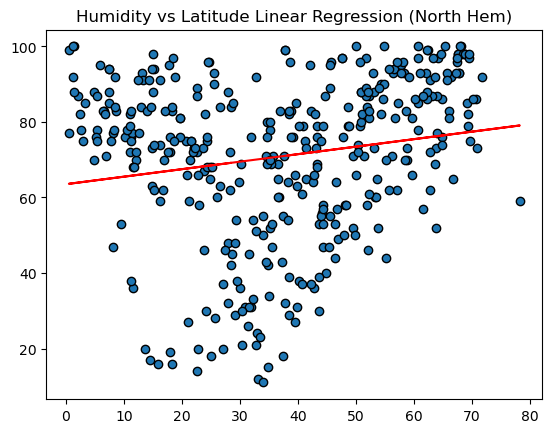

In [175]:
# Northern Hemisphere
x_axis = northern_hemisphere_df['Lat']
y_axis = northern_hemisphere_df['Humidity']
(slope, intercept, r_value, p_value, stderr) = linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.title('Humidity vs Latitude Linear Regression (North Hem)')
plt.plot(x_axis, regress, color='red')

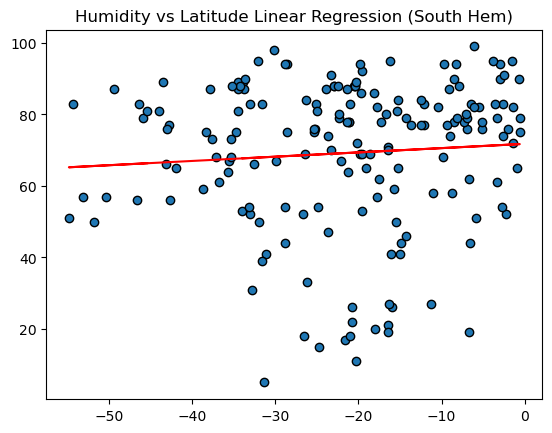

In [174]:
# Southern Hemisphere
x_axis = southern_hemisphere_df['Lat']
y_axis = southern_hemisphere_df['Humidity']
(slope, intercept, r_value, p_value, stderr) = linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis, y_axis,  marker='o', edgecolors='black')
plt.title('Humidity vs Latitude Linear Regression (South Hem)')
plt.plot(x_axis, regress, color='red')


**Discussion about the linear relationship: For the Northern Hemisphere there was a slight positive correlation for increased latitude and increased humidity. The southern hemisphere saw a very razor thin positive correlation for humidity and latitude, it almost looks stagnent. 

### Cloudiness vs. Latitude Linear Regression Plot

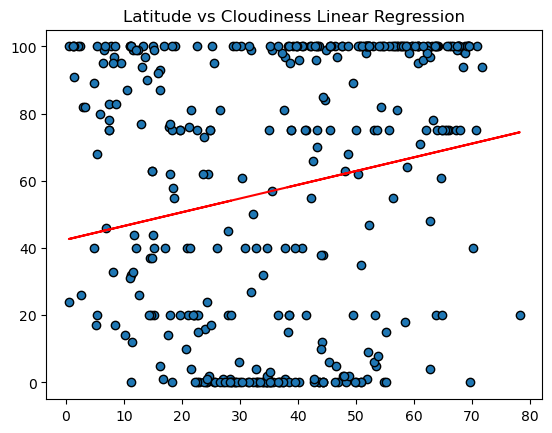

In [165]:
# Northern Hemisphere
x_axis = northern_hemisphere_df['Lat']
y_axis = northern_hemisphere_df['Cloudiness']
(slope, intercept, r_value, p_value, stderr) = linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.title("Latitude vs Cloudiness Linear Regression")
plt.plot(x_axis, regress, color='red')


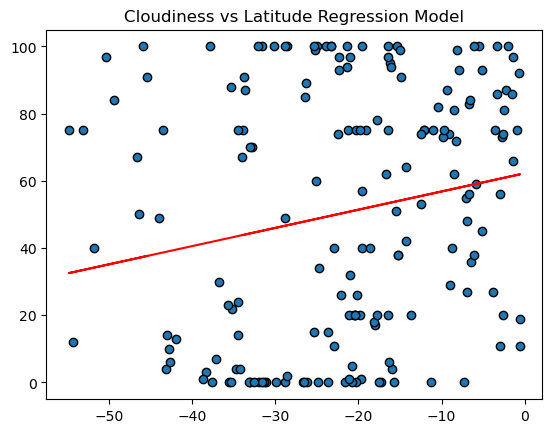

In [172]:
# Southern Hemisphere
x_axis = southern_hemisphere_df['Lat']
y_axis = southern_hemisphere_df['Cloudiness']
(slope, intercept, r_value, p_value, stderr) = linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis, y_axis,  marker='o', edgecolors='black')
plt.title("Cloudiness vs Latitude Regression Model")
plt.plot(x_axis, regress, color='red')


**Discussion about the linear relationship: For both the Northern and Southern Hemisphere there was a positive correlation between Latitude and increased cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

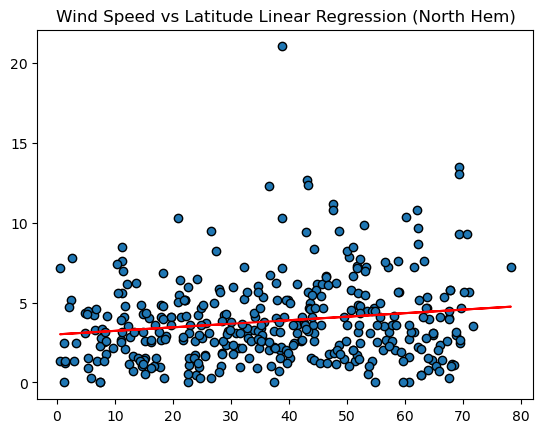

In [169]:
# Northern Hemisphere
x_axis = northern_hemisphere_df['Lat']
y_axis = northern_hemisphere_df['Wind Speed']
(slope, intercept, r_value, p_value, stderr) = linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.title("Wind Speed vs Latitude Linear Regression (North Hem)")
plt.plot(x_axis, regress, color='red')

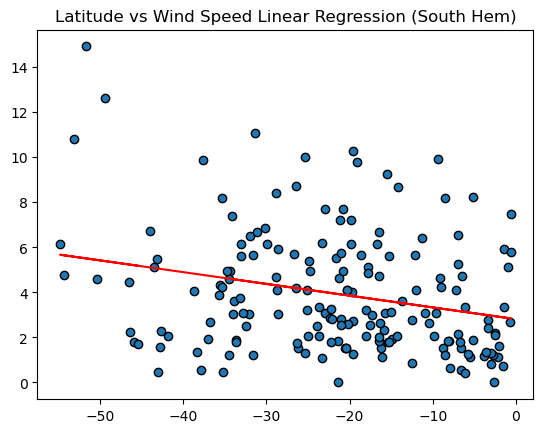

In [170]:
# Southern Hemisphere
x_axis = southern_hemisphere_df['Lat']
y_axis = southern_hemisphere_df['Wind Speed']
(slope, intercept, r_value, p_value, stderr) = linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis, y_axis,  marker='o', edgecolors='black')
plt.title("Latitude vs Wind Speed Linear Regression (South Hem)")
plt.plot(x_axis, regress, color='red')


**Discussion about the linear relationship: Slight positive correlation between increased latitude and increased wind speed for the Northern Hemisphere. For the Southern Hemisphere, there is a negative correlation between increased latitude and increased wind speed.